# BeautifulSoup

In [30]:
import requests

def download(method, url, params=None, data=None):
    try:
        resp = requests.request(method, url, params=params,data=data,headers=headers)
    except requests.exceptionsp.HTTPerror as e:
        print(e.code)
        print(e.reason)
    
    return resp


In [31]:
headers = None
html = download("get","https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query=%EB%B0%95%EB%B3%B4%EC%98%81")

In [32]:
from html import unescape

In [33]:
html.text
unescape(html.text)

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="박보영 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'박보영\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'박보영\'의 네이버 통합검색 결과입니다."> <title>박보영 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_190711.css"> <link rel="stylesheet" type="text/css" href="h

In [8]:
import re
newssection = re.findall(r'<div class="news section _prs_nws_all">.+?<div class="kinn section _kinBase">', html.text)
result = re.findall(r'<dt><a href="(.+?)" .+?>.+?</a></dt>', newssection[0])

In [9]:
result

['http://www.upkorea.net/news/articleView.html?idxno=594716',
 'http://viewers.heraldcorp.com/news/articleView.html?idxno=39209',
 'http://star.mt.co.kr/stview.php?no=2019071016145539514',
 'http://www.fnnews.com/news/201906101356597087']

In [10]:
from bs4 import BeautifulSoup
# !pip install beautifulsoup4

In [12]:
BeautifulSoup.

SyntaxError: invalid syntax (<ipython-input-12-80ff9db9b13b>, line 1)

parser lxml

<well formed 가 아닌 이유>

여는태그가 있으면 닫는태그가 있어야함

nest관계가 불분명



In [160]:
html="""
<html>
    <head></head>
    <body>
        <div id="result">
            <p class="row">
                <a class="red" id="reddd" href="www.naver.com">go to page</a>
                <a class="white">go to sibiling</a>
                <a class="blue">go to page222</a>
                <div><a>this is a</a></div>
                <a class="blue">go to page222</a>
            </p>
        </div>
    </body>
</html>
"""

In [166]:
dom = BeautifulSoup(html,"html.parser")
print(dom.prettify())

# lxml / html.parser 파서에 따라 파싱하는 방법이 다름 상황에 맞는 파서를 사용해야함!!

<html>
 <head>
 </head>
 <body>
  <div id="result">
   <p class="row">
    <a class="red" href="www.naver.com" id="reddd">
     go to page
    </a>
    <a class="white">
     go to sibiling
    </a>
    <a class="blue">
     go to page222
    </a>
    <div>
     <a>
      this is a
     </a>
    </div>
   </p>
  </div>
 </body>
</html>



In [105]:
for i in dom.html.body.div.p.children:
    print(i)



<a class="red" href="www.naver.com" id="reddd">go to page</a>


<a class="blue">go to page222</a>




In [106]:
list(dom.html.body.div.p.children)

['\n', <a class="red" href="www.naver.com" id="reddd">go to page</a>, '\n', <a class="blue">go to page222</a>, '\n']

같은 태그는 가져올 수 없음 따라서 아이디 / 클래스를 넣어준다.

In [107]:
dom.div["id"]

'result'

아이디를 가져올 때는 []에 넣어준다.

In [116]:
list(dom.html.body.div.p.children)[1]

<a class="red" href="www.naver.com" id="reddd">go to page</a>

In [119]:
dom.div.a["class"]

['red']

In [120]:
dom.div["id"].attrs
for _ in dom.p.children:
    print(type(_),_)

AttributeError: 'str' object has no attribute 'attrs'

In [121]:
dom.a.attrs

{'class': ['red'], 'id': 'reddd', 'href': 'www.naver.com'}

In [122]:
[x for x in dom.p.children][1].attrs

{'class': ['red'], 'id': 'reddd', 'href': 'www.naver.com'}

In [123]:
dom.find_all('a')

[<a class="red" href="www.naver.com" id="reddd">go to page</a>, <a class="blue">go to page222</a>]

In [124]:
dom.find_all({'div','p'})

[<div id="result">
<p>
<a class="red" href="www.naver.com" id="reddd">go to page</a>
<a class="blue">go to page222</a>
</p>
</div>, <p>
<a class="red" href="www.naver.com" id="reddd">go to page</a>
<a class="blue">go to page222</a>
</p>]

In [129]:
dom.find_all('div',{'id':'result'})

[<div id="result">
<p class="row">
<a class="red" href="www.naver.com" id="reddd">go to page</a>
<a class="blue">go to page222</a>
</p>
</div>]

In [130]:
dom.find_all("",attrs={'class':'red'})

[<a class="red" href="www.naver.com" id="reddd">go to page</a>]

In [131]:
dom.find_all('a',recursive=False)

[]

In [132]:
dom.find_all(text='go to page')

['go to page']

In [133]:
dom.find_all('a',limit=1)

[<a class="red" href="www.naver.com" id="reddd">go to page</a>]

In [134]:
dom.find_all('a',recursive=False)

[]

In [167]:
p = dom.find_all('p')


p

[<p class="row">
<a class="red" href="www.naver.com" id="reddd">go to page</a>
<a class="white">go to sibiling</a>
<a class="blue">go to page222</a>
<div><a>this is a</a></div>
</p>]

In [168]:
p[0].find_all('a',recursive=False)

[<a class="red" href="www.naver.com" id="reddd">go to page</a>, <a class="white">go to sibiling</a>, <a class="blue">go to page222</a>]

In [169]:
dom.p.find_all('a',recursive=True)

[<a class="red" href="www.naver.com" id="reddd">go to page</a>, <a class="white">go to sibiling</a>, <a class="blue">go to page222</a>, <a>this is a</a>]

In [170]:
len(dom.find_all('a'))

4

In [171]:
[_.find_parent().name for _ in dom.find_all("a")]

['p', 'p', 'p', 'div']

In [174]:
dom.p.div.a.find_parent().name

'div'

In [176]:
dom.p.div.a.find_parents()

[<div><a>this is a</a></div>, <p class="row">
<a class="red" href="www.naver.com" id="reddd">go to page</a>
<a class="white">go to sibiling</a>
<a class="blue">go to page222</a>
<div><a>this is a</a></div>
</p>, <div id="result">
<p class="row">
<a class="red" href="www.naver.com" id="reddd">go to page</a>
<a class="white">go to sibiling</a>
<a class="blue">go to page222</a>
<div><a>this is a</a></div>
</p>
</div>, <body>
<div id="result">
<p class="row">
<a class="red" href="www.naver.com" id="reddd">go to page</a>
<a class="white">go to sibiling</a>
<a class="blue">go to page222</a>
<div><a>this is a</a></div>
</p>
</div>
</body>, <html>
<head></head>
<body>
<div id="result">
<p class="row">
<a class="red" href="www.naver.com" id="reddd">go to page</a>
<a class="white">go to sibiling</a>
<a class="blue">go to page222</a>
<div><a>this is a</a></div>
</p>
</div>
</body>
</html>, 
<html>
<head></head>
<body>
<div id="result">
<p class="row">
<a class="red" href="www.naver.com" id="reddd

In [178]:
dom.p.find_all("a")[2]

<a class="blue">go to page222</a>

In [184]:
dom.p.div.find_parent()

<p class="row">
<a class="red" href="www.naver.com" id="reddd">go to page</a>
<a class="white">go to sibiling</a>
<a class="blue">go to page222</a>
<div><a>this is a</a></div>
</p>

--------------------------------------------------

In [191]:
html = download("get","https://pythonscraping.com/pages/page3.html")
html.text

'<html>\n<head>\n<style>\nimg{\n\twidth:75px;\n}\ntable{\n\twidth:50%;\n}\ntd{\n\tmargin:10px;\n\tpadding:10px;\n}\n.wrapper{\n\twidth:800px;\n}\n.excitingNote{\n\tfont-style:italic;\n\tfont-weight:bold;\n}\n</style>\n</head>\n<body>\n<div id="wrapper">\n<img src="../img/gifts/logo.jpg" style="float:left;">\n<h1>Totally Normal Gifts</h1>\n<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is\nhand-curated by well-paid, free-range Tibetan monks.<p>\nWe haven\'t figured out how to make online shopping carts yet, but you can send us a check to:<br>\n123 Main St.<br>\nAbuja, Nigeria\n</br>We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</div>\n<table id="giftList">\n<tr><th>\nItem Title\n</th><th>\nDescription\n</th><th>\nCost\n</th><th>\nImage\n</th></tr>\n\n<tr id="gift1" class="gift"><td>\nVegetable Basket\n</td><td>\nThis vegetable basket is the perfec

In [261]:
dom = BeautifulSoup(html.text,"lxml")

In [262]:
a = dom.find("div",{"id":"footer"})

In [263]:
[_.name for _ in a.find_parents()]

['div', 'body', 'html', '[document]']

In [264]:
dom.find("img")

<img src="../img/gifts/logo.jpg" style="float:left;"/>

In [265]:
dom.find("h1")

<h1>Totally Normal Gifts</h1>

In [266]:
dom.select_one("#content")

<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.<p>
We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
123 Main St.<br/>
Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>

In [267]:
dom.select_one("#giftList")

<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>
<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>
<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gift

In [280]:
a = dom.find("div",{"id":"footer"})

In [269]:
[_.name for _ in a.find_parent().children if  _.name is not None]

['img', 'h1', 'div', 'table', 'div']

In [270]:
a.find_previous_siblings()

[<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>
<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>
<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gif

In [271]:
[_.name for _ in a.find_previous_siblings()]

['table', 'div', 'h1', 'img']

In [272]:
[_.name for _ in a.find_parent().find_all(recursive=False)]

['img', 'h1', 'div', 'table', 'div']

In [273]:
dom.select_one("#gift2 > td:nth-child(4) > img")

<img src="../img/gifts/img2.jpg"/>

In [295]:
tr = a.find_parent().table.tr.find({"id":"gift2"})

In [298]:
a.find_previous_sibling()

<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>
<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>
<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gift

In [299]:
a.find_previous_sibling().find_all("tr")[1]

<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>

In [300]:
a.find_previous_sibling().find_all("tr")[1].find_all("td")[-1]

<td>
<img src="../img/gifts/img1.jpg"/>
</td>

In [301]:
a.find_previous_sibling().find_all("tr")[1].find_all("td")[-1].find()

<img src="../img/gifts/img1.jpg"/>

In [312]:
a.find_previous_sibling().find_all("img")[0].attrs["src"][2:]

'/img/gifts/img1.jpg'

In [314]:
type(html)

<class 'requests.models.Response'>

In [315]:
html.url

'https://pythonscraping.com/pages/page3.html'

In [321]:
re.findall(".+?(.com)",html.url)

AttributeError: 're.Match' object has no attribute 'findall'

In [324]:
print(re)

<re.Match object; span=(0, 26), match='https://pythonscraping.com'>


In [326]:
re[0]

'https://pythonscraping.com'

In [331]:
re[0]+a.find_previous_sibling().find_all("img")[0].attrs["src"][2:]

'https://pythonscraping.com/img/gifts/img1.jpg'

In [332]:
a.find_previous_sibling().find_all("tr")[1:]

[<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>, <tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>, <tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>, <tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parrot! 

In [333]:
imgList = [requests.compat.urljoin(html.url, _.find_all("td")[-1].find()["src"]) for _ in a.find_previous_sibling().find_all("tr")[1:]]

In [334]:
imgList

['https://pythonscraping.com/img/gifts/img1.jpg', 'https://pythonscraping.com/img/gifts/img2.jpg', 'https://pythonscraping.com/img/gifts/img3.jpg', 'https://pythonscraping.com/img/gifts/img4.jpg', 'https://pythonscraping.com/img/gifts/img6.jpg']

In [335]:
resp = download("get",imgList[0])

In [345]:
resp.headers["Content-type"].split("/")[0],
resp.headers["Content-type"].split("/")[1]

'jpeg'

In [339]:
resp.text

'����\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00��\x00<CREATOR: gd-jpeg v1.0 (using IJG JPEG v80), quality = 100\n��\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01��\x00C\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01��\x00\x11\x08\x01,\x01,\x03\x01"\x00\x02\x11\x01\x03\x11\x01��\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b��\x00�\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142���\x08#B��\x15R��$3br�\t\n\x16\

In [357]:
requests.compat.urlparse(resp.url)

ParseResult(scheme='https', netloc='pythonscraping.com', path='/img/gifts/img1.jpg', params='', query='', fragment='')

In [358]:
import re

In [344]:
resp.url.split("/")[-1].split(".")[0]

'img1'

In [348]:
filename = "{0}.{1}".format(resp.url.split("/")[-1].split(".")[0],resp.headers["Content-type"].split("/")[1])

In [349]:
with open(filename, "wb") as fp:
    fp.write(resp.content)

In [350]:
#### 정규식으로 찾는 버전
dom = BeautifulSoup(html.text,"lxml")
[_["src"] for _ in dom.find_all("img")]

['../img/gifts/logo.jpg', '../img/gifts/img1.jpg', '../img/gifts/img2.jpg', '../img/gifts/img3.jpg', '../img/gifts/img4.jpg', '../img/gifts/img6.jpg']

In [359]:
match = re.findall(r'<td>\s<img src="(.+?)">',html.text)

In [ ]:
match

In [5]:
import requests

def download(method, url, params=None, data=None, headers=None):
    try:
        resp = requests.request(method, url, params=params,data=data,headers=headers)
    except requests.exceptionsp.HTTPerror as e:
        print(e.code)
        print(e.reason)
    
    return resp


In [6]:
from bs4 import BeautifulSoup

In [7]:
import re

In [8]:
from html import unescape

In [9]:
import html

In [10]:
import requests

In [3]:
url = "https://search.naver.com/search.naver?where=image&sm=tab_jum&query=%EB%B0%95%EB%B3%B4%EC%98%81"
html = download("get",url)

In [26]:
dom = BeautifulSoup(html.text,"lxml")

In [27]:
[(_["alt"], _["data-source"]) for _ in dom.find("div",{"class":"photo_grid _box"}).find_all("img")]

[('여기 박보영빠돌이있지않음?? | 카페',
  'https://search.pstatic.net/common/?src=http%3A%2F%2Fcafefiles.naver.net%2F20140419_115%2Falsdnr4721_1397918757998zpEC6_JPEG%2F-1042080401.jpg&type=b400'),
 ("박보영 '요정이 눈 앞에'[엑's HD포토] | 포토뉴스",
  'https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F311%2F2019%2F04%2F30%2F0000985275_001_20190430071110015.jpg&type=b400'),
 ('박보영 : 힘쎈여자도봉순 도봉순 | 블로그',
  'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAxODA3MDRfMTQ4%2FMDAxNTMwNjY3NjY3NjEz.zj9Umgo5orK-9sGr3r5yWQBn9HIYKJY3YVzz4Gzk1bsg.cstJdYVKQm2SFg5M9o0TVOKPaMBM5ud-Rag1IaPZ9Lkg.JPEG.js2y86%2Fqkrqhdud14.jpg&type=b400'),
 ('박보영 사진 모음 #1 (스왑주의) | 블로그',
  'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAxODEwMTBfMTA1%2FMDAxNTM5MTc2ODM0MDI5.mlRvQ8JGvq5N4tNpgT_wWgPrxlMg6cHXpGDGISJ9iskg.i0sOEaB-ad78ykWXzDiHA33UAqp-g-Mr2ZqPrkD_tZ0g.JPEG.angel000429%2F1539176666436.jpg&type=b400'),
 ("'열정같은소리하고있네' 박보영·정재영, 겨울 패션 화보 공개 | 블로그",
  'https://s

re.findall('<img src=".+?" class="_img" alt="(.+?)" onerror=".+?" data-source="(.+?)" data-width="\d+?" data=height="\d+">', html.text)

In [28]:
dom

<!DOCTYPE html>
<html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="박보영 : 네이버 이미지검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'박보영'의 네이버 이미지검색 결과입니다." property="og:description"/> <meta content="'박보영'의 네이버 이미지검색 결과입니다." lang="ko" name="description"/> <title>박보영 : 네이버 이미지검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_190711.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstat

In [29]:
html="""
<html>
    <head></head>
    <body>
        <div id="result">
            <p class="row">
                <a class="red" id="reddd" href="www.naver.com">go to page</a>
                <a class="white">go to sibiling</a>
                <a class="blue">go to page222</a>
                <div><a>this is a</a></div>
                <a class="blue">go to page222</a>
            </p>
        </div>
    </body>
</html>
"""
dom = BeautifulSoup(html,"html.parser")

In [30]:
dom.select("div")

[<div id="result">
 <p class="row">
 <a class="red" href="www.naver.com" id="reddd">go to page</a>
 <a class="white">go to sibiling</a>
 <a class="blue">go to page222</a>
 <div><a>this is a</a></div>
 <a class="blue">go to page222</a>
 </p>
 </div>, <div><a>this is a</a></div>]

In [31]:
dom.select("div#result")

[<div id="result">
 <p class="row">
 <a class="red" href="www.naver.com" id="reddd">go to page</a>
 <a class="white">go to sibiling</a>
 <a class="blue">go to page222</a>
 <div><a>this is a</a></div>
 <a class="blue">go to page222</a>
 </p>
 </div>]

In [32]:
dom.select("div#result")

[<div id="result">
 <p class="row">
 <a class="red" href="www.naver.com" id="reddd">go to page</a>
 <a class="white">go to sibiling</a>
 <a class="blue">go to page222</a>
 <div><a>this is a</a></div>
 <a class="blue">go to page222</a>
 </p>
 </div>]

In [12]:
headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
url = "https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81&oq=%EB%B0%95%EB%B3%B4%EC%98%81&aqs=chrome..69i57j0j69i60j0l3.1957j0j7&sourceid=chrome&ie=UTF-8"
html = download("get",url,headers=headers)


In [13]:
dom = BeautifulSoup(html.text,"lxml")

'<!DOCTYPE html>\n<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko">\n <head>\n  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>\n  <meta content="origin" name="referrer"/>\n  <title>\n   박보영 - Google 검색\n  </title>\n  <script nonce="iP7KkajkXWA29qElMuoleQ==">\n   (function(){window.google={kEI:\'PDwoXb6iE9SJr7wP--iX8AE\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_PDwoXb6iE9SJr7wP--iX8AE\',kGL:\'KR\'};google.sn=\'web\';google.kHL=\'ko\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=google.logUrl(a,b,e,
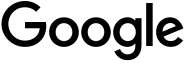
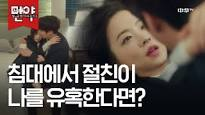
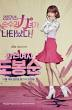
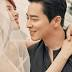

In [49]:
dom.prettify()

In [15]:
[(_["href"], _.text) for _ in dom.select(".rc > .r a")]

[('https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81',
  '박보영 - 위키백과, 우리 모두의 백과사전https://ko.wikipedia.org/wiki/박보영'),
 ('#', ''),
 ('https://webcache.googleusercontent.com/search?q=cache:gv9t4wBBoSMJ:https://ko.wikipedia.org/wiki/%25EB%25B0%2595%25EB%25B3%25B4%25EC%2598%2581+&cd=11&hl=ko&ct=clnk&gl=kr',
  '저장된\xa0페이지'),
 ('/search?q=related:https://ko.wikipedia.org/wiki/%25EB%25B0%2595%25EB%25B3%25B4%25EC%2598%2581+%EB%B0%95%EB%B3%B4%EC%98%81&tbo=1&sa=X&ved=2ahUKEwi0l8Ps77XjAhWQBKYKHe75CgAQHzAKegQIARAF',
  '유사한 페이지'),
 ('https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D',
  '박보영의 작품 목록 - 위키백과, 우리 모두의 백과사전https://ko.wikipedia.org/wiki/박보영의_작품_목록'),
 ('#', ''),
 ('https://webcache.googleusercontent.com/search?q=cache:VhhxhBJ2kukJ:https://ko.wikipedia.org/wiki/%25EB%25B0%2595%25EB%25B3%25B4%25EC%2598%2581%25EC%259D%2598_%25EC%259E%2591%25ED%2592%2588_%25EB%25AA%25A9%25EB%25A1%259D+&cd=12&hl=ko&ct=clnk&gl=kr',
  '저장된\xa0페이지'),


In [ ]:
headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
url = "https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81&oq=%EB%B0%95%EB%B3%B4%EC%98%81&aqs=chrome..69i57j0j69i60j0l3.1957j0j7&sourceid=chrome&ie=UTF-8"
html = download("get",url,headers=headers)